# 단순 선형회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 당뇨병 데이터셋

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [11]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

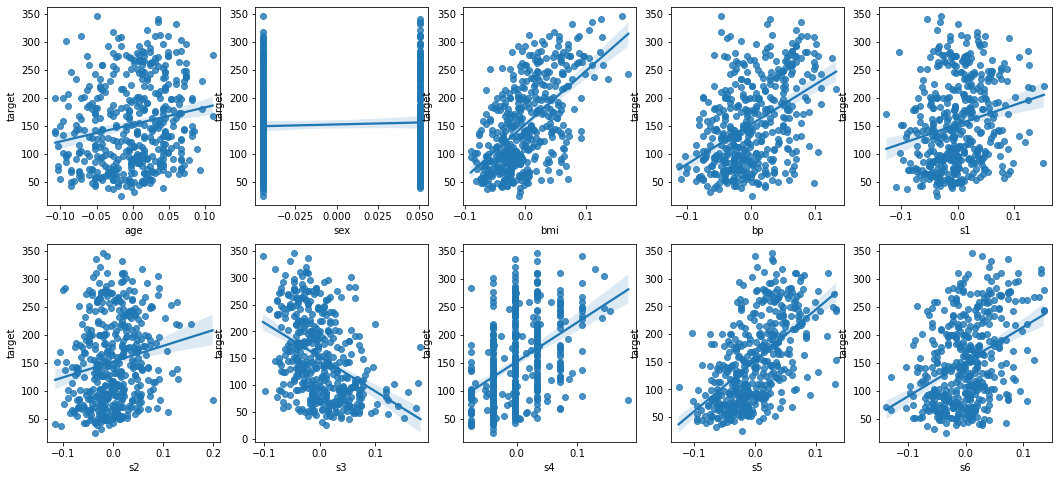

In [6]:
import seaborn as sns
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18,8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

- BMI vs target, BP vs target

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
# BMI vs target
lr.fit(df.bmi.values.reshape(-1,1), diabetes.target)
lr.score(df.bmi.values.reshape(-1,1), diabetes.target)

0.3439237602253803

In [9]:
# BP vs target
lr.fit(df.bp.values.reshape(-1,1), diabetes.target)
lr.score(df.bp.values.reshape(-1,1), diabetes.target)


0.19490798886682947

- 훈련/데스트 데이터셋 분리(test_size=0.1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [13]:
lr2 = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.coef_, lr.intercept_, lr._residues

(array([977.81113753]), 152.28695031603942, 1559426.1877638428)

In [14]:
from sklearn.metrics import r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.17874580965139086

In [15]:
lr.score(X_test, y_test)

0.17874580965139086

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3577.1382963531237, 59.809182374892266)

- 시각화

In [18]:
y_test[0], pred[0]

(155.0, 145.16480259305965)

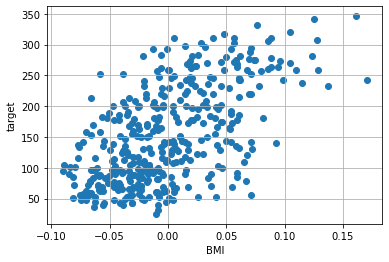

In [22]:
plt.scatter(X_train, y_train)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.show()

In [23]:
min(X_train), max(X_train)

(array([-0.0902753]), array([0.17055523]))

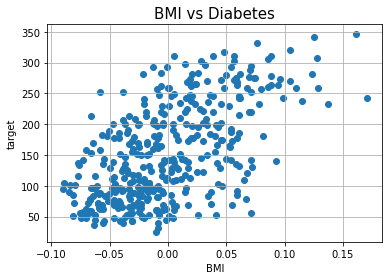

In [24]:
plt.scatter(X_train, y_train)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('BMI vs Diabetes', fontsize=15)
plt.show()

In [25]:
xs = np.array([-0.1, 0.18])
ys = xs * lr.coef_ + lr.intercept_
ys

array([ 54.50583656, 328.29295507])

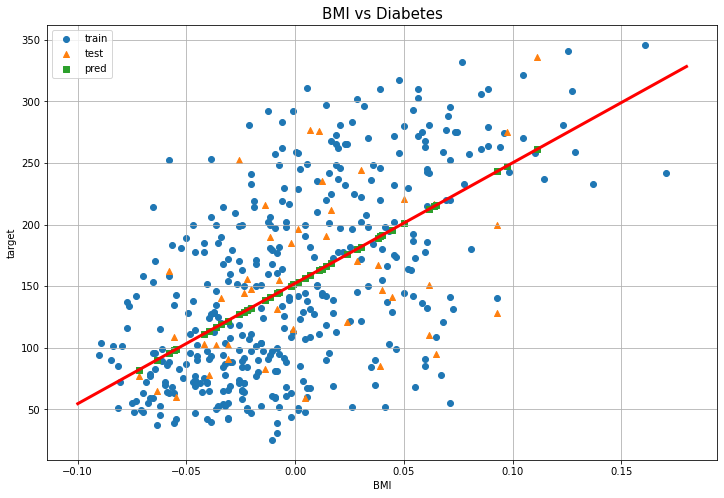

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, marker='^', label='test')
plt.scatter(X_test, pred, marker='s', label='pred')
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('target')
plt.title('BMI vs Diabetes', fontsize=15)
plt.legend()
plt.show()

- BP vs target

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.bp.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2021
)

In [34]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [35]:
# coef - array / intercept - 스칼라
lr2.coef_, lr2.intercept_

(array([721.61788968]), 151.20147738352864)

In [36]:
lr2.score(X_test2, y_test2)

0.22296036461624136

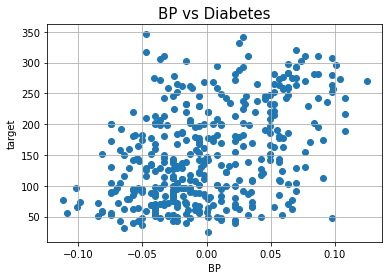

In [40]:
plt.scatter(X_train2, y_train2)
plt.grid()
plt.xlabel('BP')
plt.ylabel('target')
plt.title('BP vs Diabetes', fontsize=15)
plt.show()

In [41]:
xs2 = np.array([-0.12,0.14])
ys2 = xs2 * lr2.coef_ + lr2.intercept_
ys2

array([ 64.60733062, 252.22798194])

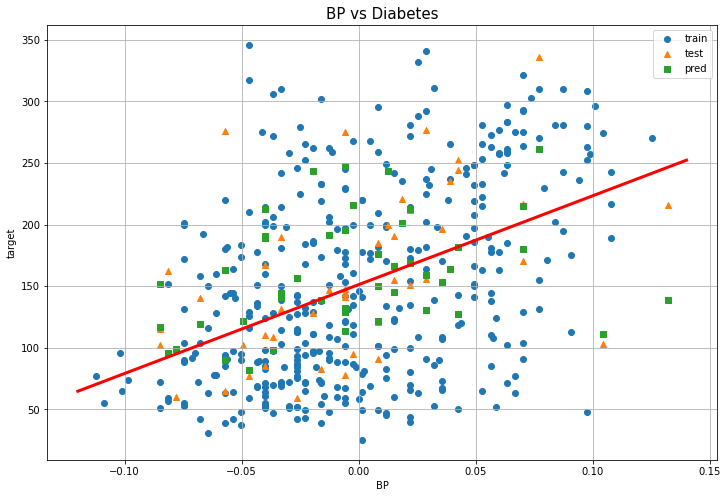

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(X_train2, y_train2, label='train')
plt.scatter(X_test2, y_test2, marker='^', label='test')
plt.scatter(X_test2, pred, marker='s', label='pred')
plt.plot(xs2, ys2, 'r-', lw=3)
plt.grid()
plt.xlabel('BP')
plt.ylabel('target')
plt.title('BP vs Diabetes', fontsize=15)
plt.legend()
plt.show()